## pH Level Forecasting



#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the pH level of well samples in Malawi is affected by other variables such as Temperature (Temp(oC)), Specific Electrical Conductivity (SEC (µS/cm)), Turbidity (Turbidity (NTU)), Total Iron (Total Iron (mg/l)), Titration 1, Titration 2, Volume 50/100ml, Sulphuric acid cartridges (N_VALUE) and Bicarbonate (HCO3) and Corrected bicarbonate (Corrected_HCO3).


### 2) Data Collection
- Dataset Source - Leeds Beckett University Malawi well project data.
- The dataset consists of 22 column and 200 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
%pwd

'c:\\Users\\Vallee\\Desktop\\Stack\\myDS_projects\\pH_level_forecasting\\notebook'

In [2]:
import os
os.chdir("../")

In [3]:
%pwd

'c:\\Users\\Vallee\\Desktop\\Stack\\myDS_projects\\pH_level_forecasting'

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the Excel Data as Pandas DataFrame

In [15]:
df = pd.read_excel('notebook/Dataset/Dataset Disssertation.xlsx')

#### Show Top 5 Records

In [16]:
df.head()

,WP_ID,DataType,Date_Assessment_Original,Date_Assessment,Time_Assessment,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),...,Volume 50/100ml,N_VALUE,HCO3,Corrected_HCO3,Tryptophan_Probe_µgL,Sample_taken,SURVEY_DETAIL_ID,COUNTRY,Comment,Final HCO3
0,MMZ37,Field,NaN,2016-09-05,10:40:00,23.3,5.99,123.7,0.21,0.0,...,50.0,0.16,56.198952,56.198952,NaN,Sampled,941,MAL,PVC pipes installed,56.198952
1,MMZ38,Field,NaN,2016-09-05,14:10:00,24.9,6.03,115.2,0.15,0.0,...,50.0,0.16,59.490430,59.490430,NaN,Sampled,942,MAL,PVC pipes installed,59.490430
2,MMZ39,Field,NaN,2016-09-06,03:30:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Not sampled,943,MAL,NaN,NaN
3,MMZ40,Field,NaN,2016-09-06,04:35:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Not sampled,944,MAL,NaN,NaN
4,MMZ35,Field,NaN,2016-09-06,09:30:00,24.7,5.65,367.9,0.25,0.0,...,50.0,0.16,96.550043,96.550043,NaN,Sampled,939,MAL,PVC pipes installed,96.550043


#### Shape of the dataset

In [17]:
df.shape

(200, 22)

### 2.2 Dataset information

- WP_ID:Record id
- DataType: Type of data
- Date_Assessment_Original: Original date of assessment
- Date_Assessment: Recorded date of assessment
- Time_Assesment: Recorded time of assessment
- Temp(oC): Temperature reading
- pH: pH Level reading
- SEC (µS/cm): Specific Electrical Conductivity
- Turbidity (NTU): Turbidity of the Sample
- Total Iron (mg/l): Total Iron contained in the sample
- Titration 1: First titration of the sample
- Titration 2: Second titration of the sample
- Volume 50/100ml: Volume of the sample
- N_VALUE: Sulphuric acid cartridges
- HCO3: Bicarbonate level
- Corrected_HCO3: Corrected Bicarbonate level
- Tryptophan_Probe_µgL: Tryptophan-like Fluorescence (TLF)
- Sample_taken: Record of if sample was taken or not
- SURVEY_DETAIL_ID: ID of the survey taken
- COUNTRY: Country where sample was taken
- Comment: Comment on the survey
- Final HCO3: Final bicarbonate reading

### 3. Data Checks to perform

- Drop all unsampled rows
- Drop unneeded features
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Remove all Unsampled Rows

In [18]:
# Remove all Unsampled Rows
df = df[df['Sample_taken'] == 'Sampled']
df.shape

(162, 22)

### 3.2 Drop Unneeded Features

In [19]:
df= df.drop(columns=['WP_ID','DataType','Date_Assessment_Original','SURVEY_DETAIL_ID','COUNTRY','Comment','HCO3','Corrected_HCO3','Sample_taken'],axis=1)
df.shape

(162, 13)

In [20]:
df = df.drop(columns=['Date_Assessment','Time_Assessment'])
df.sample(5)

,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,Volume 50/100ml,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
30,24.8,6.55,447.3,0.14,0.00,251.0,241.0,50.0,1.60,NaN,59.978057
24,22.4,6.11,181.8,0.16,0.00,537.0,530.0,50.0,0.16,NaN,130.074363
159,27.6,6.65,183.2,0.82,0.00,28.0,26.0,50.0,1.60,0.3,65.829575
82,24.1,6.76,1025.0,0.51,0.01,141.0,150.0,50.0,1.60,NaN,35.474826
73,27.3,6.26,171.2,0.75,0.01,403.0,405.0,50.0,0.16,0.2,98.500549


### 3.3 Check Missing values

In [21]:
df.isna().sum()

Temp (oC)                0
pH                       0
SEC (µS/cm)              0
Turbidity (<NTU)         0
Total Iron (mg/l)        1
Titration 1              0
Titration 2              0
Volume 50/100ml          0
N_VALUE                  0
Tryptophan_Probe_µgL    64
Final HCO3               0
dtype: int64

#### There are some missing values found in Tryptophan_Probe_µgL column as well as Total Iron (mg/l) column of the data set, therfore we recruit the services of simple imputer from sci-kit learn library

In [22]:
imputer = SimpleImputer(strategy='median')
columns_to_impute = ['Total Iron (mg/l)', 'Tryptophan_Probe_µgL']
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [23]:
df.isna().sum()

Temp (oC)               0
pH                      0
SEC (µS/cm)             0
Turbidity (<NTU)        0
Total Iron (mg/l)       0
Titration 1             0
Titration 2             0
Volume 50/100ml         0
N_VALUE                 0
Tryptophan_Probe_µgL    0
Final HCO3              0
dtype: int64

#### There are no missing values after Imputation

### 3.4 Check Duplicates

In [24]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.5 Check data types

In [25]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temp (oC)             162 non-null    float64
 1   pH                    162 non-null    float64
 2   SEC (µS/cm)           162 non-null    float64
 3   Turbidity (<NTU)      162 non-null    float64
 4   Total Iron (mg/l)     162 non-null    float64
 5   Titration 1           162 non-null    float64
 6   Titration 2           162 non-null    float64
 7   Volume 50/100ml       162 non-null    float64
 8   N_VALUE               162 non-null    float64
 9   Tryptophan_Probe_µgL  162 non-null    float64
 10  Final HCO3            162 non-null    float64
dtypes: float64(11)
memory usage: 15.2 KB


### 3.6 Checking the number of unique values of each column

In [26]:
df.nunique()

Temp (oC)                56
pH                      107
SEC (µS/cm)             159
Turbidity (<NTU)         92
Total Iron (mg/l)        35
Titration 1             143
Titration 2             139
Volume 50/100ml           2
N_VALUE                   2
Tryptophan_Probe_µgL     22
Final HCO3              156
dtype: int64

### 3.7 Check statistics of data set

In [27]:
df.describe()

,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,Volume 50/100ml,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000,162.000000
mean,26.193210,6.774815,581.073519,1.359877,0.013043,264.555556,265.62963,50.308642,1.022222,0.554691,240.507463
std,1.657736,0.524319,533.605582,4.546827,0.021452,201.324157,204.18643,3.928371,0.708002,0.453633,214.188784
min,22.400000,5.140000,31.560000,0.080000,-0.007000,28.000000,26.00000,50.000000,0.160000,0.100000,10.362063
25%,24.725000,6.422500,229.875000,0.280000,0.000000,129.250000,125.25000,50.000000,0.160000,0.300000,76.557357
50%,26.600000,6.815000,449.400000,0.400000,0.010000,198.500000,202.50000,50.000000,1.600000,0.450000,156.650006
75%,27.600000,7.120000,768.025000,0.787500,0.018000,328.000000,332.75000,50.000000,1.600000,0.500000,351.395831
max,29.900000,7.980000,3951.000000,52.300000,0.170000,880.000000,901.00000,100.000000,1.600000,3.400000,896.013654


### 3.8 Exploring Data

In [28]:
df.head()

,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,Volume 50/100ml,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
0,23.3,5.99,123.7,0.21,0.00,228.0,233.0,50.0,0.16,0.45,56.198952
1,24.9,6.03,115.2,0.15,0.00,246.0,242.0,50.0,0.16,0.45,59.490430
4,24.7,5.65,367.9,0.25,0.00,401.0,391.0,50.0,0.16,0.45,96.550043
5,24.3,6.09,314.8,0.24,0.01,376.0,373.0,50.0,0.16,0.45,91.308058
7,23.6,7.06,334.6,11.70,0.00,752.0,788.0,50.0,0.16,0.45,187.736194


In [29]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['Temp (oC)', 'pH', 'SEC (µS/cm)', 'Turbidity (<NTU)', 'Total Iron (mg/l)', 'Titration 1', 'Titration 2', 'Volume 50/100ml', 'N_VALUE', 'Tryptophan_Probe_µgL', 'Final HCO3']

We have 0 categorical features : []


### 4. Exploring Data ( Visualization )
#### 4.1 Univariate Analysis of Numerical Variables

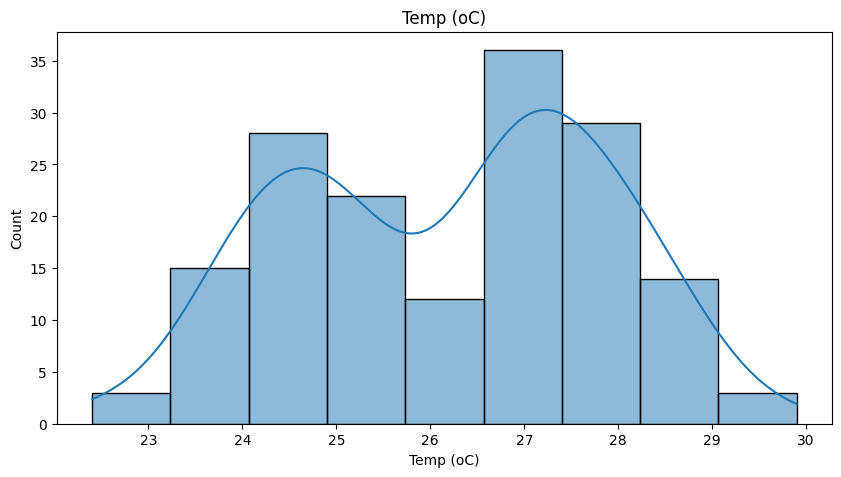

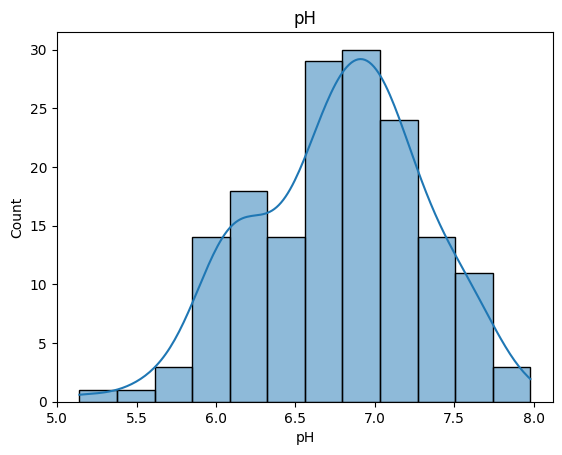

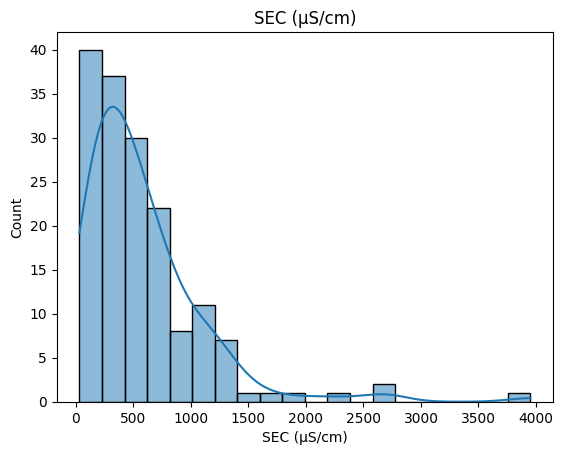

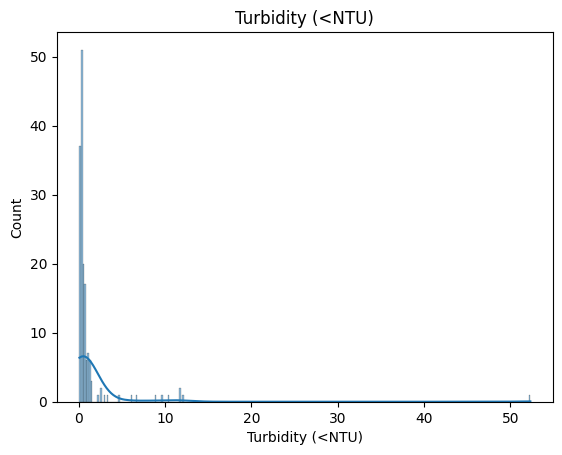

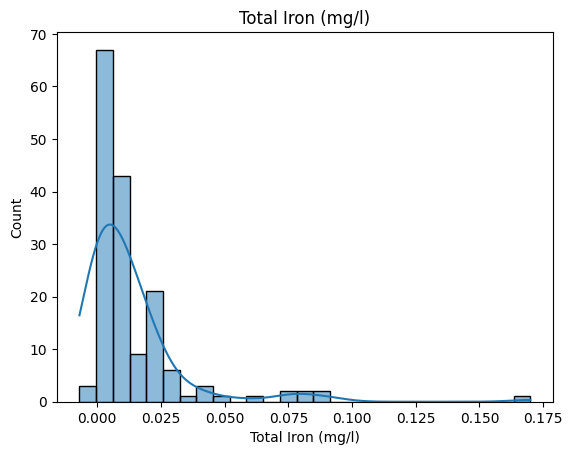

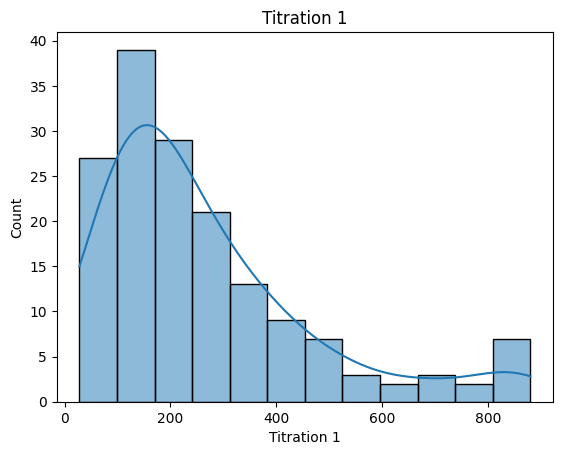

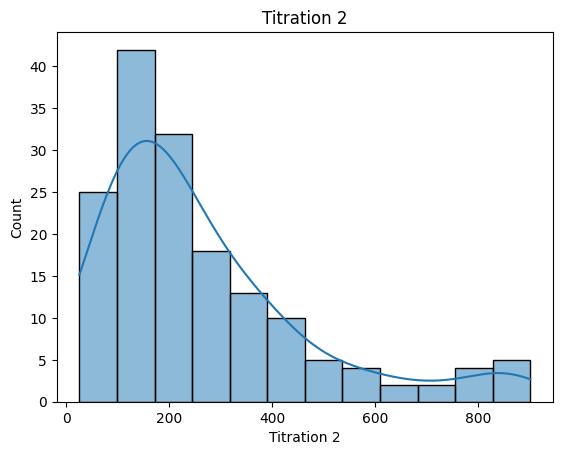

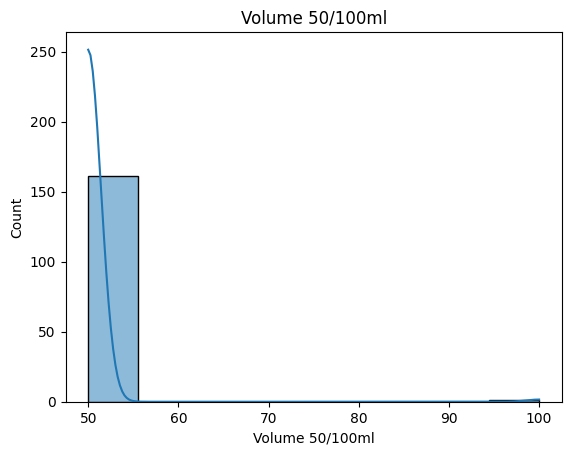

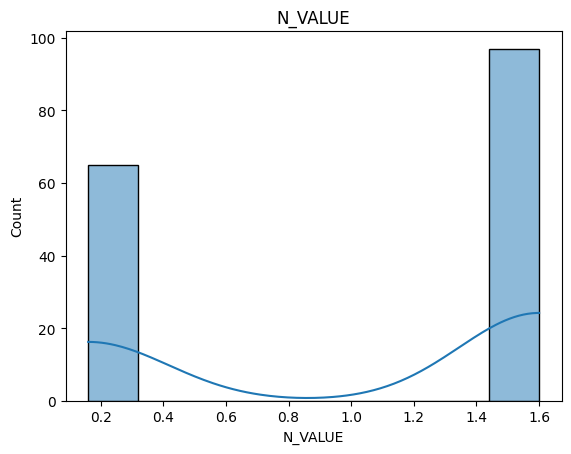

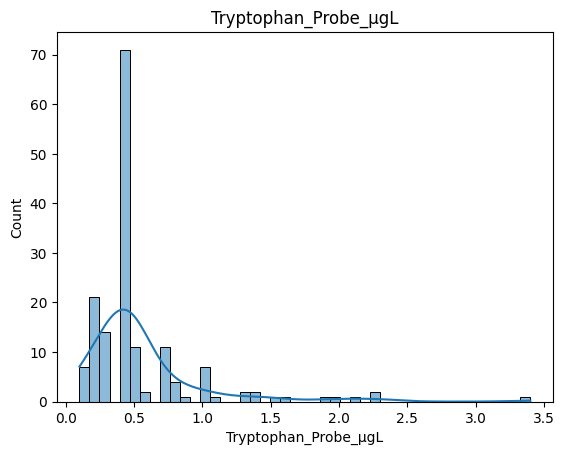

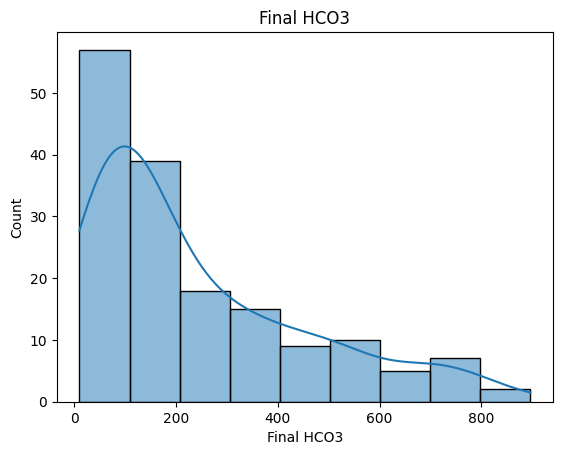

In [30]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numeric_features:
    sns.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

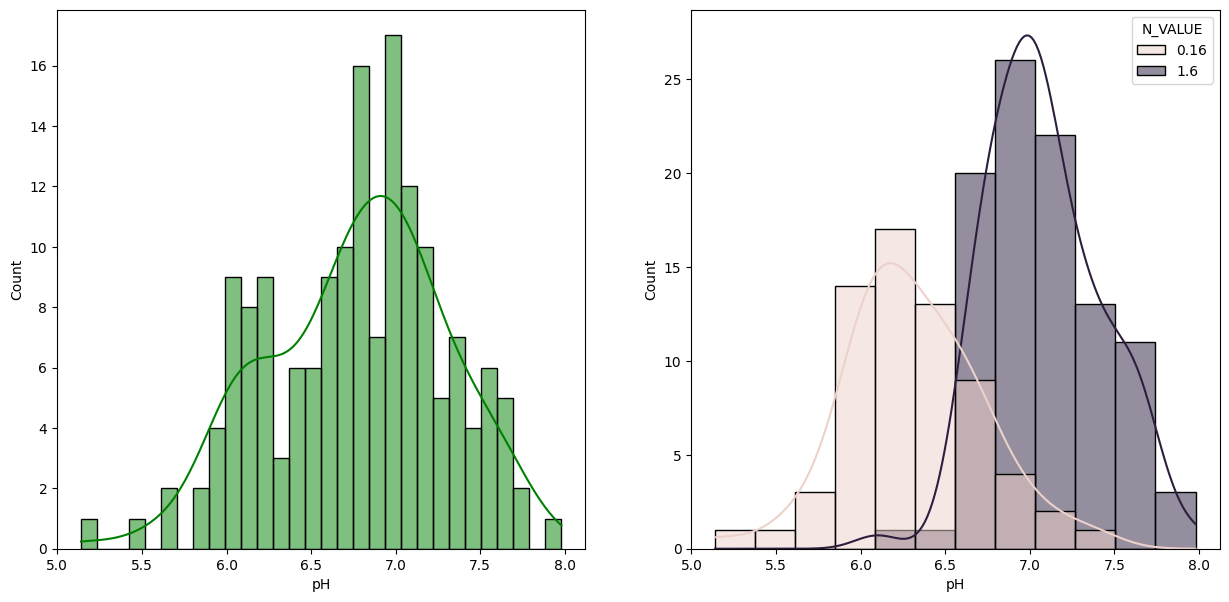

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='pH',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='pH',kde=True,hue='N_VALUE')
plt.show()

##### Insight: Houses closer less than 1 hour proximity to the ocean tend to have higher median value

#### 4.2 Correlation Heatmap

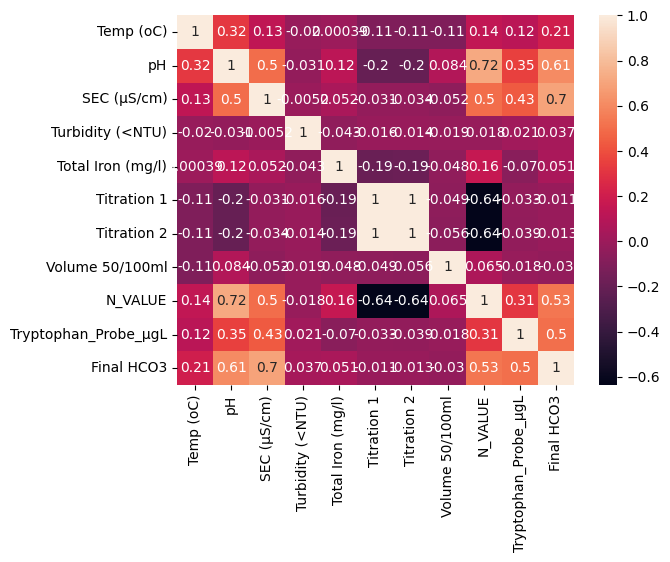

In [33]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

#####  4.4 Pairplot

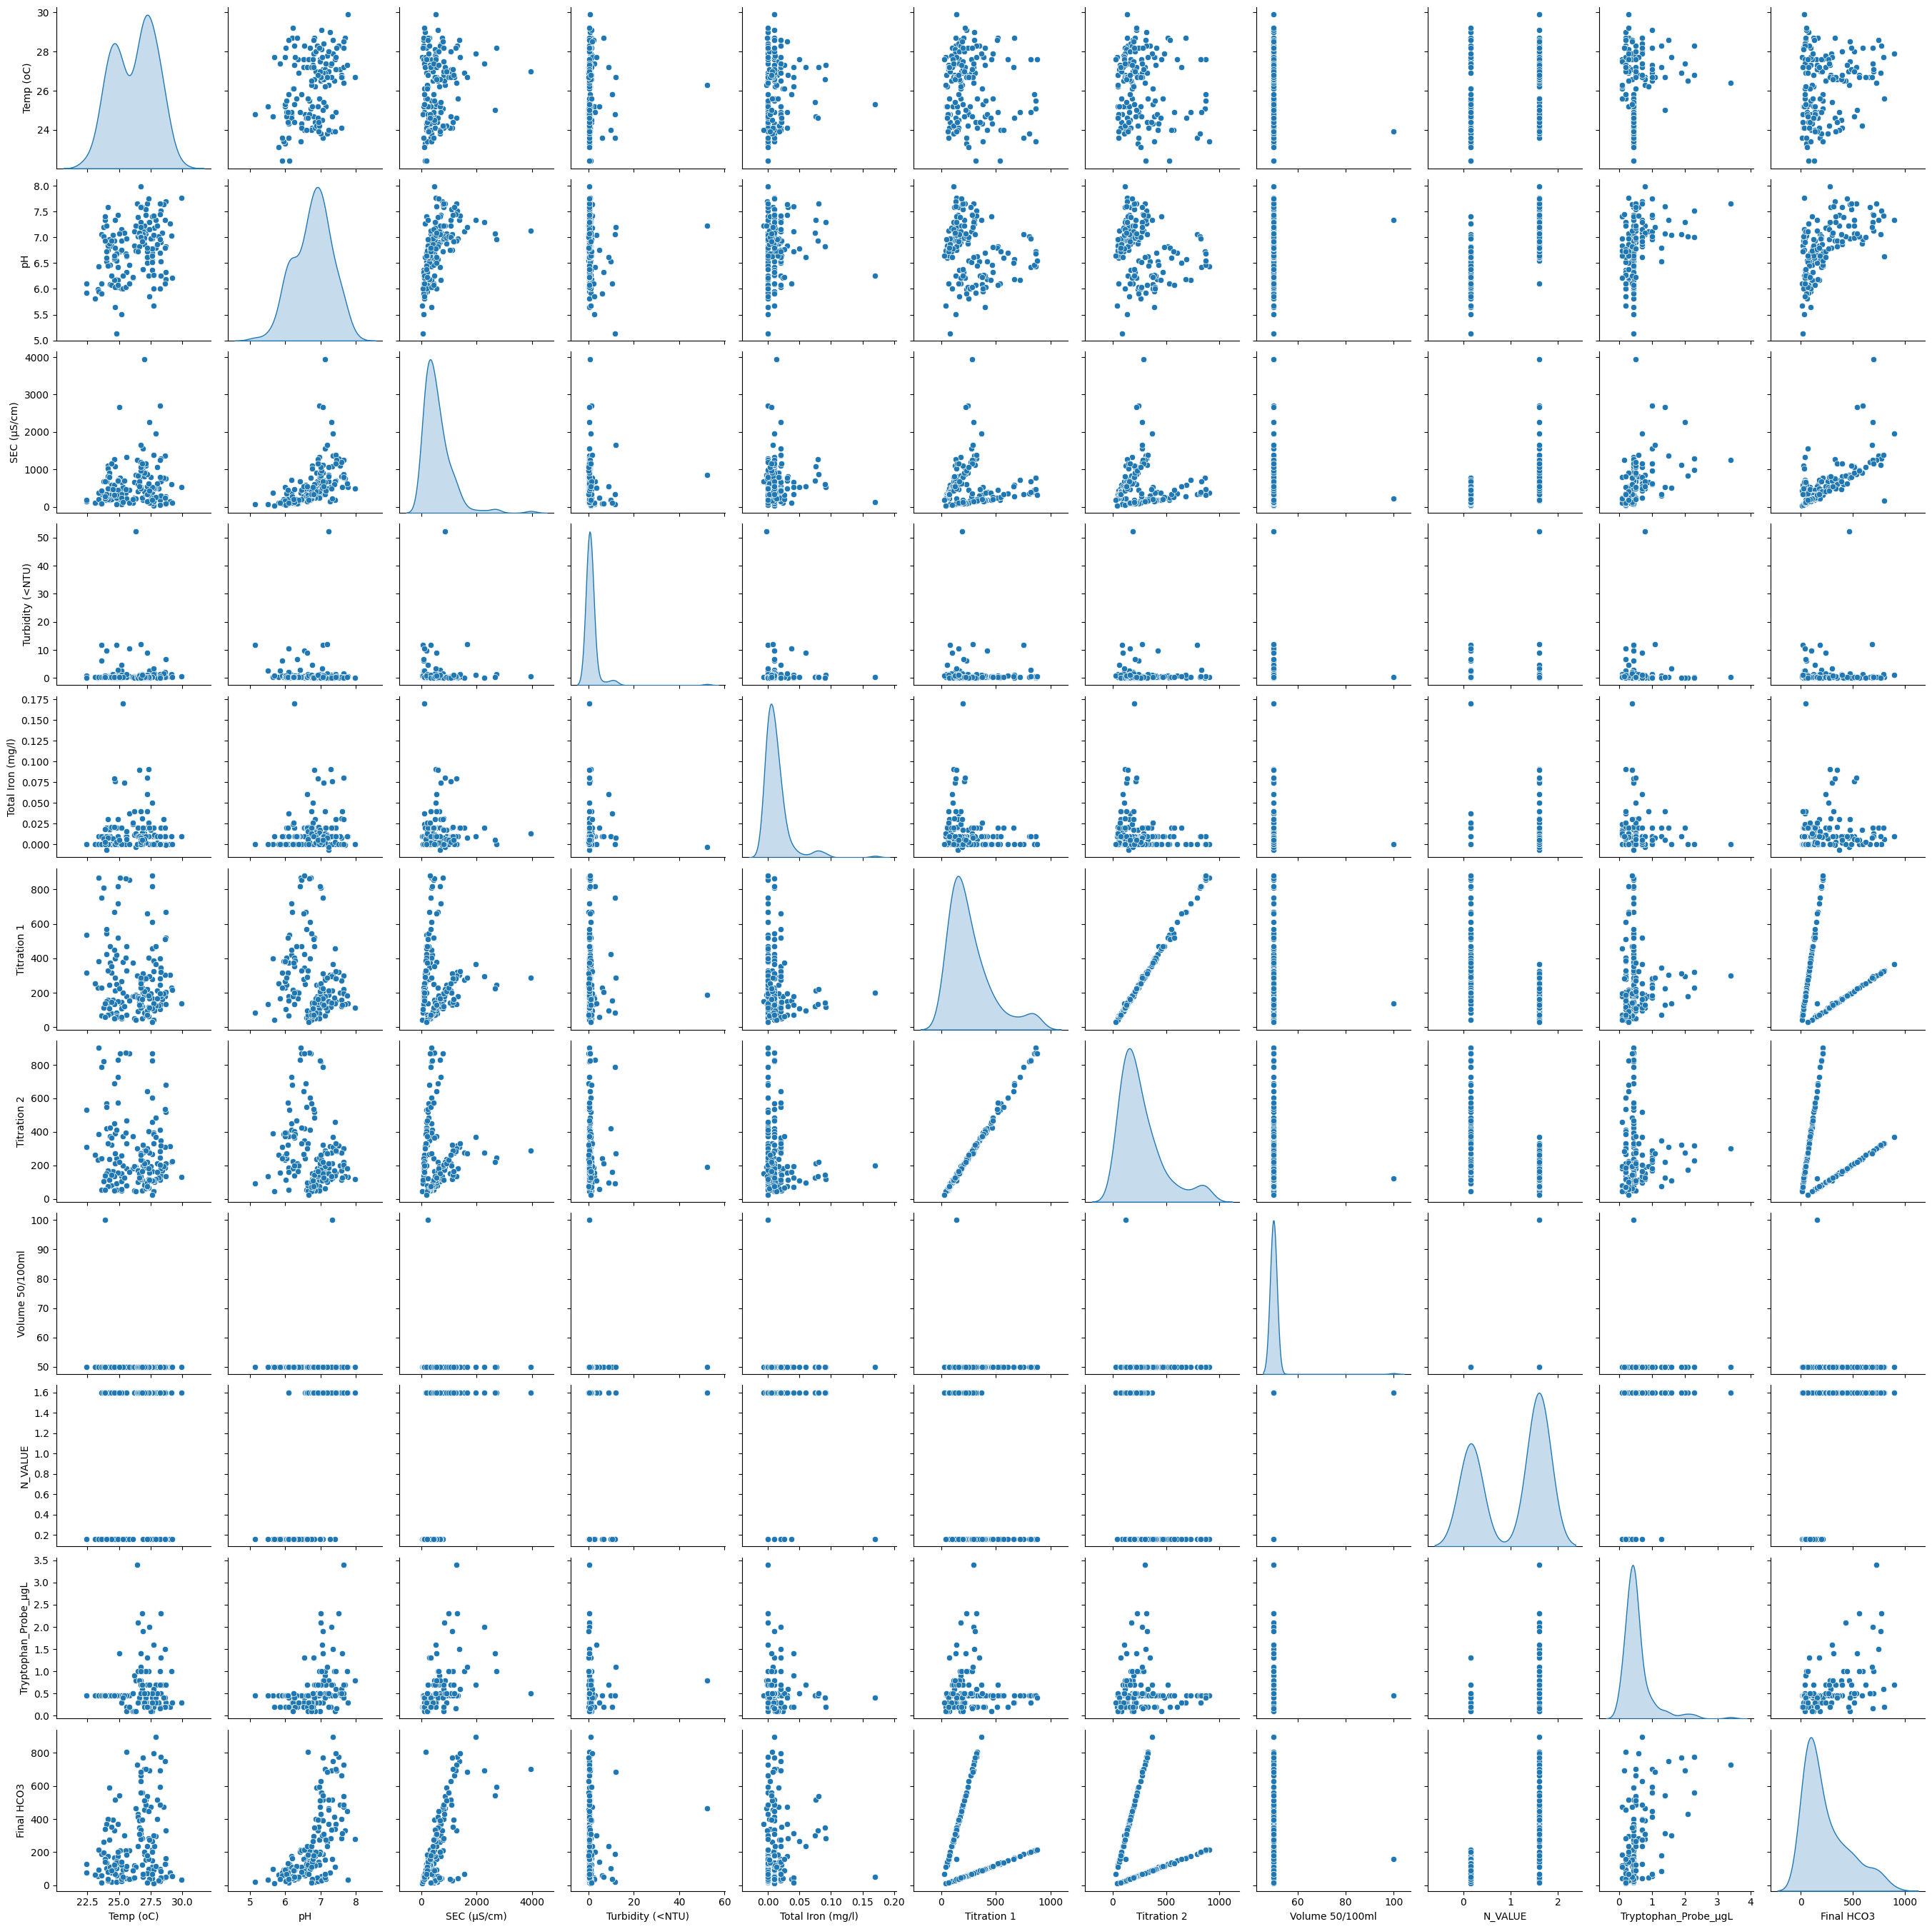

In [34]:
sns.pairplot(df,diag_kind='kde')
plt.show()